In [3]:
import pandas as pd
import numpy as np

In [4]:
telco = pd.read_csv('C://Users/mkrijal/Desktop/Assignment1/Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
int_services = telco[[ 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MonthlyCharges','Churn']]
int_services.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
0,DSL,No,Yes,No,No,No,No,29.85,No
1,DSL,Yes,No,Yes,No,No,No,56.95,No
2,DSL,Yes,Yes,No,No,No,No,53.85,Yes
3,DSL,Yes,No,Yes,Yes,No,No,42.30,No
4,Fiber optic,No,No,No,No,No,No,70.70,Yes


In [6]:
def num(strA):  #change string to numbers
    if strA == 'Fiber optic':
        return 1
    elif strA == 'DSL':
        return 0.5
    elif strA == 'Yes':
        return 1
    else:
        return 0

In [7]:
int_services['InternetService'] = int_services['InternetService'].apply(num)
int_services['OnlineSecurity'] = int_services['OnlineSecurity'].apply(num)
int_services['OnlineBackup'] = int_services['OnlineBackup'].apply(num)
int_services['DeviceProtection'] = int_services['DeviceProtection'].apply(num)
int_services['TechSupport'] = int_services['TechSupport'].apply(num)
int_services['StreamingTV'] = int_services['StreamingTV'].apply(num)
int_services['StreamingMovies'] = int_services['StreamingMovies'].apply(num)
int_services.head()

C:\Users\mkrijal\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mkrijal\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\mkrijal\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
0,0.5,0,1,0,0,0,0,29.85,No
1,0.5,1,0,1,0,0,0,56.95,No
2,0.5,1,1,0,0,0,0,53.85,Yes
3,0.5,1,0,1,1,0,0,42.30,No
4,1.0,0,0,0,0,0,0,70.70,Yes


In [9]:
#Create ne column called Count and get total number of internet services
int_services['Count'] = int_services['InternetService'] + int_services['OnlineSecurity'] + int_services['OnlineBackup'] + int_services['DeviceProtection'] + int_services['TechSupport'] + int_services['StreamingTV'] + int_services['StreamingMovies']  # assigned to a column
int_services.head()

C:\Users\mkrijal\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn,count,Count
0,0.5,0,1,0,0,0,0,29.85,No,1.5,1.5
1,0.5,1,0,1,0,0,0,56.95,No,2.5,2.5
2,0.5,1,1,0,0,0,0,53.85,Yes,2.5,2.5
3,0.5,1,0,1,1,0,0,42.30,No,3.5,3.5
4,1.0,0,0,0,0,0,0,70.70,Yes,1.0,1.0


In [10]:
del int_services['count']
int_services.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn,Count
0,0.5,0,1,0,0,0,0,29.85,No,1.5
1,0.5,1,0,1,0,0,0,56.95,No,2.5
2,0.5,1,1,0,0,0,0,53.85,Yes,2.5
3,0.5,1,0,1,1,0,0,42.30,No,3.5
4,1.0,0,0,0,0,0,0,70.70,Yes,1.0


In [11]:
#function min and max
def get_stats(group):
    return {'min': group.min(), 'max': group.max()}

int_services['MonthlyCharges'].groupby([int_services['Count']]).apply(get_stats)

Count     
0.0    max     26.90
       min     18.25
0.5    max     52.15
       min     23.45
1.0    max     77.90
       min     67.75
1.5    max     63.05
       min     28.45
2.0    max     87.05
       min     72.75
2.5    max     72.15
       min     33.15
3.0    max     97.65
       min     77.80
3.5    max     77.80
       min     37.70
4.0    max    104.05
       min     82.95
4.5    max     82.15
       min     43.25
5.0    max    108.80
       min     90.10
5.5    max     89.65
       min     52.50
6.0    max    114.10
       min     98.15
6.5    max     94.80
       min     62.50
7.0    max    118.75
       min    106.30
Name: MonthlyCharges, dtype: float64

In [12]:
int_services['MonthlyCharges'].groupby(int_services['Count']).mean()

Count
0.0     21.079194
0.5     40.277721
1.0     72.077569
1.5     46.485904
2.0     79.951180
2.5     52.094273
3.0     88.353109
3.5     59.311579
4.0     95.475194
4.5     67.861838
5.0    102.269675
5.5     75.601601
6.0    108.236034
6.5     84.627972
7.0    114.311702
Name: MonthlyCharges, dtype: float64

In [17]:
int_services.groupby(['Churn', 'Count']).size().unstack()

Count,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0
Churn,,,,,,,,,,,,,,,
No,1413,173,158,281,243,362,301,413,399,326,336,266,234,141,128
Yes,113,121,241,134,308,92,278,62,244,33,157,15,56,2,13


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

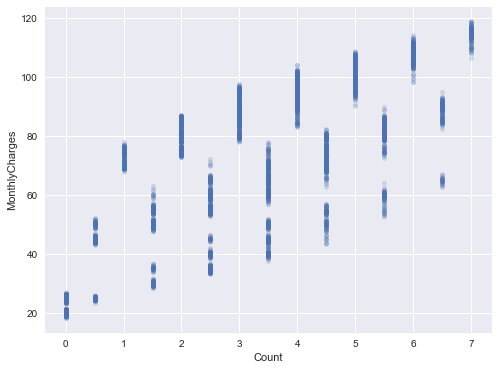

In [20]:
# Pandas scatter plot
int_services.plot(kind='scatter', x='Count', y='MonthlyCharges', alpha=0.2)

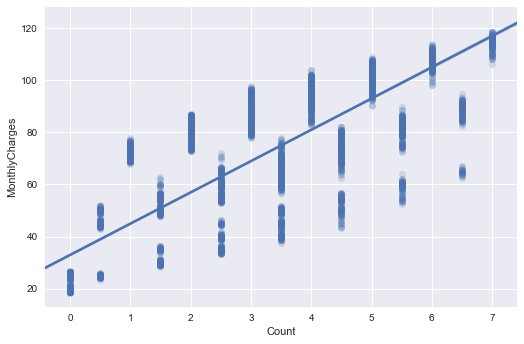

In [21]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Count', y='MonthlyCharges', data=int_services, aspect=1.5, scatter_kws={'alpha':0.2})

In [22]:
# create X and y
feature_cols = ['Count']
X = int_services[feature_cols]
y = int_services.MonthlyCharges

In [23]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

32.9098989219
[ 12.02241121]


In [25]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*6.5  #No of services = 6.5

array([ 111.05557176])

In [26]:
# use the predict method
linreg.predict(6.5)

array([ 111.05557176])

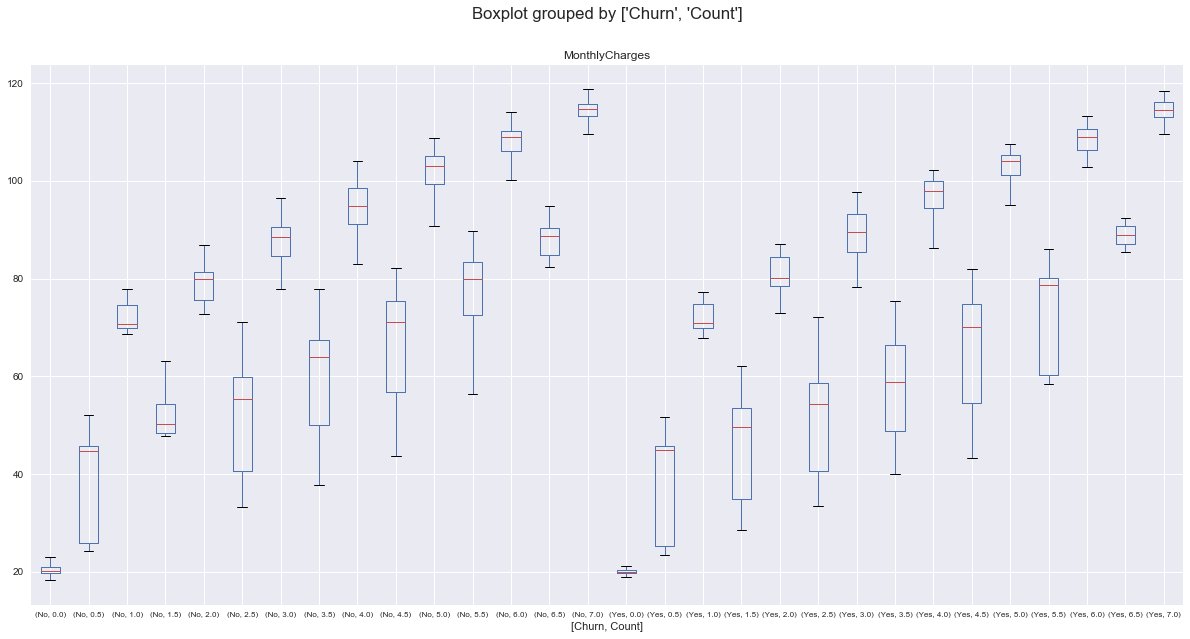

In [33]:
# box plot of rentals, grouped by season
int_services.boxplot(column='MonthlyCharges', by=['Churn', 'Count'], fontsize=8, figsize=(20,10))

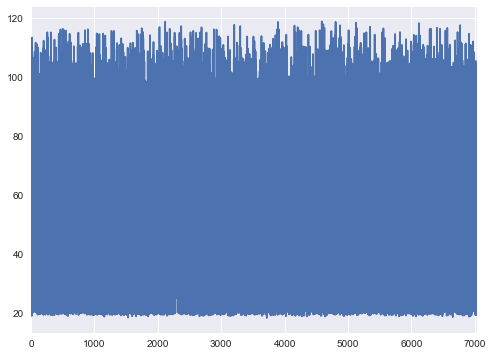

In [34]:
int_services.MonthlyCharges.plot()

In [39]:
int_services.corr()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Count
InternetService,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,0.905491,0.606286
OnlineSecurity,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.296594,0.542954
OnlineBackup,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.441780,0.618275
DeviceProtection,0.313603,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.482692,0.682047
TechSupport,0.164833,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.338304,0.606619
StreamingTV,0.429707,0.176207,0.282106,0.390874,0.278070,1.000000,0.533094,0.629603,0.699480
StreamingMovies,0.427264,0.187398,0.274501,0.402111,0.279358,0.533094,1.000000,0.627429,0.702787
MonthlyCharges,0.905491,0.296594,0.441780,0.482692,0.338304,0.629603,0.627429,1.000000,0.822131
Count,0.606286,0.542954,0.618275,0.682047,0.606619,0.699480,0.702787,0.822131,1.000000


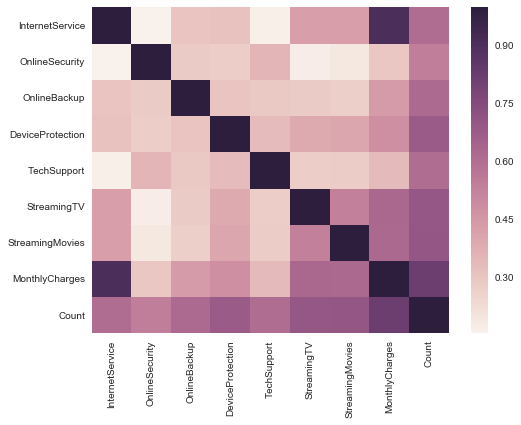

In [40]:
sns.heatmap(int_services.corr())

In [42]:
from sklearn import linear_model

int_services_X = int_services.Count[:, np.newaxis]

int_services_X_train = int_services_X[:-20] #training set
int_services_X_test = int_services_X[-20:]  #testing set

int_services_y_train = int_services.MonthlyCharges[:-20]  #training set
int_services_y_test = int_services.MonthlyCharges[-20:]   #testing set

regr = linear_model.LinearRegression()

regr.fit(int_services_X_train, int_services_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Coefficients: 
 [ 12.02774162]
Mean squared error: 338.91
Variance score: 0.51


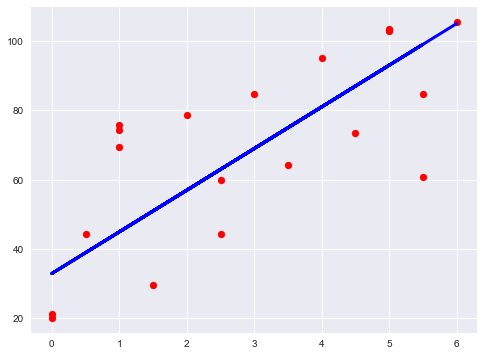

In [44]:
print('Coefficients: \n', regr.coef_)

print ('Mean squared error: %.2f' % np.mean((regr.predict(int_services_X_test) - int_services_y_test) ** 2))

print('Variance score: %.2f' % regr.score(int_services_X_test, int_services_y_test))


plt.scatter(int_services_X_test, int_services_y_test, color='red')
plt.plot(int_services_X_test, regr.predict(int_services_X_test), color='blue', linewidth=3)
plt.show()

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

In [8]:
x = int_services['MonthlyCharges']
data = [go.Histogram(x=x,histnorm='probability')]

py.iplot(data, filename='normalized histogram')

In [10]:
x = int_services['MonthlyCharges']
data = [go.Histogram(x=x)]

py.iplot(data, filename='basic histogram')